In [24]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

from sklearn.model_selection import train_test_split
import sklearn
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error 

In [25]:
data = pd.read_csv("./spam.csv", encoding='ISO-8859-1')
data = data.fillna("")
data["Message"] = data["Msg"] + " " + data["Msg_2"] + " " + data["Msg_3"] + " " + data["Msg_4"]
data = data.drop({'Msg', 'Msg_2', 'Msg_3' , 'Msg_4'}, axis=1)

In [26]:
data["Type"] = data["Type"].map({'ham' : 0, 'spam' : 1})
data.head

<bound method NDFrame.head of       Type                                            Message
0        0  Go until jurong point, crazy.. Available only ...
1        0                   Ok lar... Joking wif u oni...   
2        1  Free entry in 2 a wkly comp to win FA Cup fina...
3        0  U dun say so early hor... U c already then say...
4        0  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567     1  This is the 2nd time we have tried 2 contact u...
5568     0           Will Ì_ b going to esplanade fr home?   
5569     0  Pity, * was in mood for that. So...any other s...
5570     0  The guy did some bitching but I acted like i'd...
5571     0                      Rofl. Its true to its name   

[5572 rows x 2 columns]>

In [60]:
s = set()
for sent in data['Message']:
  for word in sent.split():
    s.add(word)
total_words_length=len(s)
print(total_words_length)

avg_words_len=round(sum([len(i.split()) for i in data['Message']])/len(data['Message']))
print(avg_words_len)


15759
16


A visual representation of the data

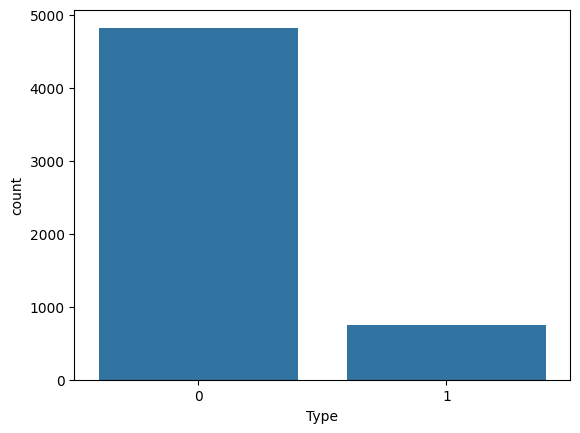

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Type', data=data)
plt.show()

As we do have enough spam, decided to go with a neural model instead of anomaly detection

In [42]:
avg_words_len=round(sum([len(i.split()) for i in data['Message']])/len(data['Message']))
print(avg_words_len)

16


In [44]:
X = data["Message"]
Y = data["Type"]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Different Models
### Baseline Model

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score

tfidf_vec = TfidfVectorizer().fit(X_train)
X_train_vec,X_test_vec = tfidf_vec.transform(X_train),tfidf_vec.transform(X_test)

baseline_model = MultinomialNB()
baseline_model.fit(X_train_vec,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [56]:
print(accuracy_score(y_test, baseline_model.predict(X_test_vec)))
print(classification_report(y_test, baseline_model.predict(X_test_vec)))

0.9623318385650225
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



Score to beat: 96.2%

### Transfered learning

In [61]:
import tensorflow_hub as hub

# Load the Universal Sentence Encoder from TensorFlow Hub
use_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [66]:
X_train_embedded = use_model(X_train)
X_test_embedded = use_model(X_test)

In [ ]:
model = tf.keras.Sequential([
    layers.Input(shape=(512,)), 
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid') 
])